In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

%matplotlib inline

In [2]:
# customize matplotlib defaults
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = 6.4, 4.8
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.prop_cycle'] = prop_cycle=(cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']) +
                                              cycler('linestyle', ['-', '--', ':', '-.']) + 
                                              cycler('marker', ['o', 's','d', 'v']))
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 0
mpl.rcParams['ytick.minor.size'] = 0
mpl.rcParams['legend.markerscale']  = 1.0
mpl.rcParams['legend.fontsize'] = 16

In [3]:
def parse_file(filename):
    """Custom function to read Amarita's excel data"""
    
    data = {}
    with open(filename, 'r') as f:
        lines = f.readlines()
        for w in lines[0].split():
            data[w] = []
        
        for il in range(1, len(lines)):
            for w, v in zip(lines[0].split(), lines[il].split()):
                data[w].append(float(v))
        for k in data.keys():
            data[k] = np.array(data[k])
    return data

### Dummy data scaling figure

In [4]:
data0 = parse_file('scaling_dummy_data.txt')
x_axis_label = [(int(p), int(w)) for p,w in zip(data0['PS'], data0['Worker'])]

In [34]:
def make_plot0():
    plt.plot(data0['eff_per_worker'], label='Per worker');
    plt.plot(data0['eff_per_node'], label='Per node');
    plt.xticks(list(range(len(data0['eff_per_worker']))), x_axis_label, rotation=40);
    plt.xlabel('(#PS, #Worker)');
    plt.ylabel('Efficiency');
    plt.legend(loc=3);
    plt.ylim(0,120);
    vals = plt.yticks()
    plt.yticks(vals[0][1:-1], ['%i%%'%int(x) for x in vals[0][1:-1]])
    legend = plt.legend(loc=3, title='ResNet-50');
    plt.setp(legend.get_title(),fontsize=16);

make_plot0()
plt.tight_layout()
plt.savefig('scaling_dummy_data.pdf')

### Scaling vs. PS

In [6]:
data1 = parse_file('scaling_dummy_w_vs_ps.txt')

In [42]:
def make_plot1():
    workers = 64; plt.plot(data1['PS'][data1['Workers']==workers], data1['eff'][data1['Workers']==workers], label='%i'%workers);
    workers = 128; plt.plot(data1['PS'][data1['Workers']==workers], data1['eff'][data1['Workers']==workers], label='%i'%workers);
    workers = 256; plt.plot(data1['PS'][data1['Workers']==workers], data1['eff'][data1['Workers']==workers], label='%i'%workers);
    workers = 512; plt.plot(data1['PS'][data1['Workers']==workers], data1['eff'][data1['Workers']==workers], label='%i'%workers);
    plt.xscale('log');
    plt.xticks([2**n for n in range(8)],[2**n for n in range(8)]);
    plt.ylim(0,120);
    vals = plt.yticks();
    plt.yticks(vals[0][1:-1], ['%i%%'%int(x) for x in vals[0][1:-1]]);
    plt.ylabel('Efficiency');
    plt.xlabel('#PS');

    legend = plt.legend(loc=1, title='#Workers');
    plt.setp(legend.get_title(),fontsize=16);
    
    plt.text(1, 5, "ResNet-50", fontsize=16);

make_plot1()
plt.tight_layout()
plt.savefig('scaling_dummy_w_vs_ps.pdf')

### plot HEP network scaling

In [8]:
data_hep = parse_file('scaling_hep.txt')

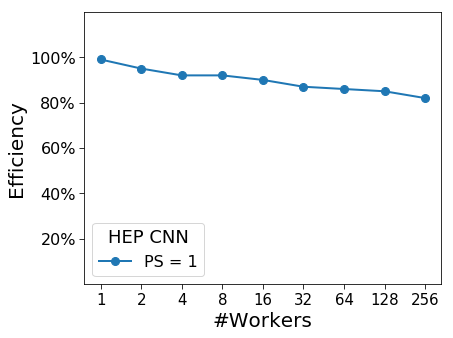

In [18]:
def make_plot2():
    plt.plot(data_hep['Workers'], data_hep['eff'], label='PS = 1');
    plt.xscale('log');
    plt.xticks([2**n for n in range(9)],[2**n for n in range(9)]);
    plt.ylim(0,120);
    vals = plt.yticks();
    plt.yticks(vals[0][1:-1], ['%i%%'%int(x) for x in vals[0][1:-1]]);
    plt.ylabel('Efficiency');
    plt.xlabel('#Workers');

    legend = plt.legend(loc=3, title='HEP CNN');
    plt.setp(legend.get_title(),fontsize=18);

make_plot2()
plt.tight_layout()
plt.savefig('scaling_hep.pdf')

In [61]:
fig, ax = plt.subplots(1,3, figsize=(3*6.4, 4.8), sharey=True)
plt.tight_layout();
plt.subplot(1,3,1); make_plot0();
plt.text(0.01, 110, "(a)", fontsize=20);
ax[1] = plt.subplot(1,3,2, sharey=ax[0]); make_plot1(); ax[1].set_yticklabels([]); ax[1].set_ylabel("");
plt.text(0.9, 110, "(b)", fontsize=20);
ax[2] = plt.subplot(1,3,3, sharey=ax[0]); make_plot2(); ax[2].set_yticklabels([]); ax[2].set_ylabel("");
plt.text(0.9, 110, "(c)", fontsize=20);

plt.savefig('paper_figure.pdf',  bbox_inches="tight")